In [15]:
# Employee Attrition Prediction & HR Analytics
# JupyterLab Notebook

In [16]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
# 2️⃣ Load Data
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Employee_Attrition.xlsx"
df = pd.read_excel(file_path)

In [18]:
# 3️⃣ Quick Look at Data
print(df.head())
print(df.info())
print(df.describe())

   EmployeeID Department  Attendance  PerformanceScore
0           1         IT          30                81
1           2    Finance          17                88
2           3         HR          25                98
3           4         IT          11                81
4           5         IT           1                53
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Department        100 non-null    object
 2   Attendance        100 non-null    int64 
 3   PerformanceScore  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None
       EmployeeID  Attendance  PerformanceScore
count  100.000000  100.000000        100.000000
mean    50.500000   14.480000         74.400000
std     29.011492    9.405006         14.760718
min      1.000000    0.000000         50.000

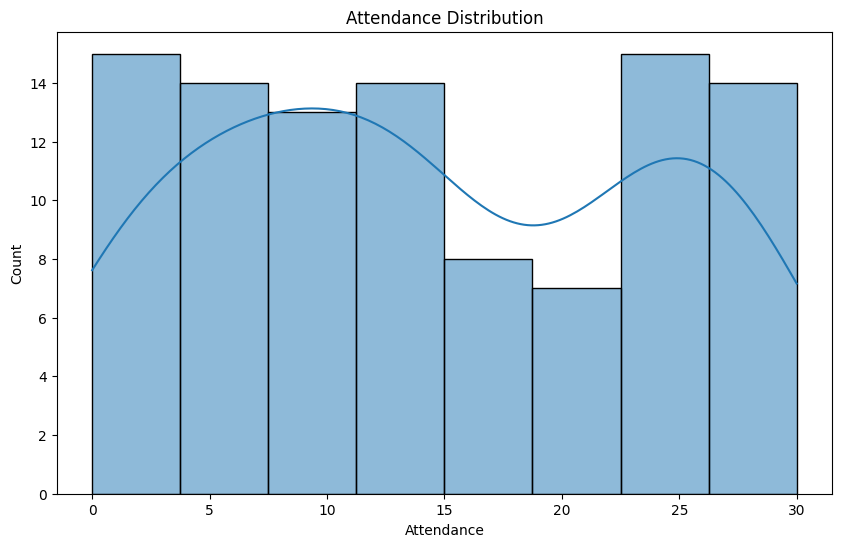

In [19]:
# 4️⃣ Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.histplot(df['Attendance'], kde=True)
plt.title("Attendance Distribution")
plt.show()

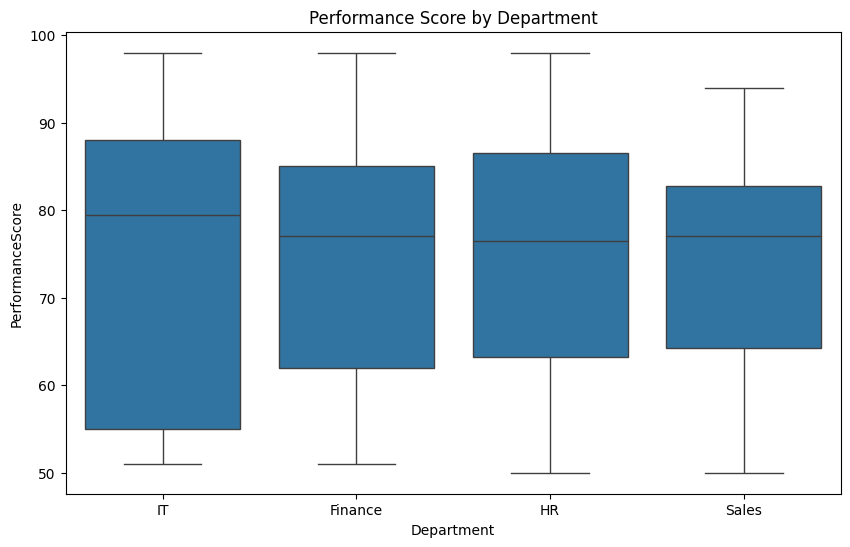

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='PerformanceScore', data=df)
plt.title("Performance Score by Department")
plt.show()

In [21]:
# 5️⃣ Preprocessing
# Example: simple feature encoding for Department
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)

In [22]:
# Target column: Assume employees with Attendance < 10 or PerformanceScore < 60 are at risk of attrition
df_encoded['Attrition'] = np.where((df_encoded['Attendance']<10) | (df_encoded['PerformanceScore']<60), 1, 0)

In [23]:
# Split Features and Target
X = df_encoded.drop(['EmployeeID', 'Attrition'], axis=1)
y = df_encoded['Attrition']

In [24]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# 6️⃣ Build Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# 7️⃣ Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[11  0]
 [ 0  9]]


In [28]:
# 8️⃣ Feature Importance
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

            Feature  Importance
0        Attendance    0.580924
1  PerformanceScore    0.380492
3     Department_IT    0.024638
2     Department_HR    0.006983
4  Department_Sales    0.006963
